In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('WineQT.csv')

VOIR LES VARIABLES : ON SE CONCENTRE SUR ['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']

[[0.7  9.4  0.56 0.  ]]
[5 5 5 ... 5 6 5]
1143
1143


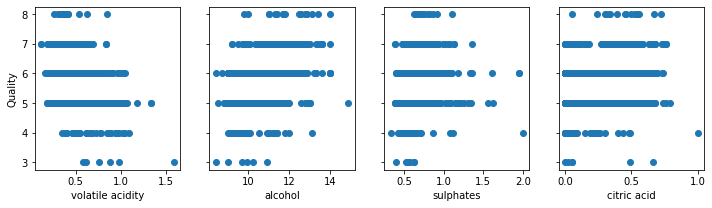

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# load the dataset

y_train = df['quality']
X_train= [df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']]
X_features = ['volatile acidity','alcohol','sulphates','citric acid']
X_train=np.transpose(np.asmatrix(X_train))
y_train=np.asarray(y_train)
print(X_train[:1])
print(y_train)
print(len(X_train))
print(len(y_train))
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter([X_train[:,i]],[y_train])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Quality")
plt.show()

In [4]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 

In [5]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
print(X_norm)

X_mu = [[ 0.53133858 10.4421114   0.65770779  0.26836395]], 
X_sigma = [[0.1795546  1.0817221  0.17032416 0.19659979]]
Peak to Peak range by column in Raw        X:[[1.46 6.5  1.67 1.  ]]
Peak to Peak range by column in Normalized X:[[8.13123157 6.00893702 9.80483344 5.08647531]]
[[ 0.93933222 -0.96338181 -0.57365783 -1.36502663]
 [ 1.94181282 -0.59360107  0.1308811  -1.36502663]
 [ 1.27349242 -0.59360107 -0.04525363 -1.16156762]
 ...
 [ 0.38239855  0.05351522 -0.45623467 -0.9581086 ]
 [ 0.10393172  0.70063152  0.60057372 -0.8563791 ]
 [ 0.6330187  -0.22382033  0.30701583 -0.75464959]]


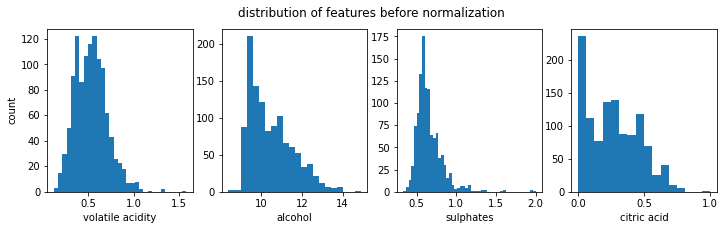

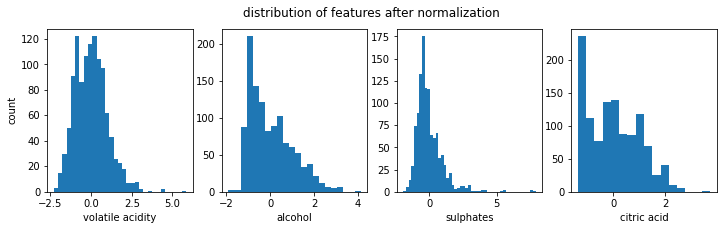

In [6]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(X_train[:,i],bins='auto')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))

for i in range(len(ax)):
    ax[i].hist(X_norm[:,i],bins='auto')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

modif jeu de données

(556,)
(556, 4)


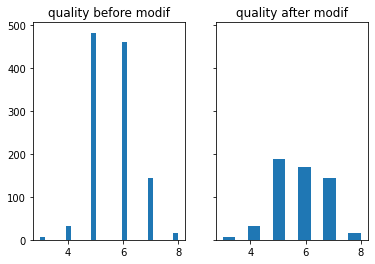

In [7]:
import random

fig,ax=plt.subplots(1,2,sharey=True)
ax[0].hist(df["quality"], bins='auto',label="quality")
ax[0].set_title("quality before modif")
supp=[]
#on supprime aleatoirement des valeurs de notes 5 et 6 (diviser par 3)
for i in range(len(y_train)):
    if y_train[i]==5 or y_train[i]==6:
        rand=random.random()
        if(rand>0.4):
            supp.append(i)
for j in range(len(supp)):
    y_train2=np.delete(y_train,supp)
    X_norm2=np.delete(X_norm,supp,0)


ax[1].hist(y_train2, bins='auto',label="quality")
ax[1].set_title("quality after modif")

print(y_train2.shape)
print(X_norm2.shape)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [10]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

In [11]:
x=np.array(X_norm2)
y=np.array(y_train2).reshape(-1,1)
print(x.shape, y.shape)

(556, 4) (556, 1)


In [53]:
Xt = np.tile(x,(100,1))
Yt= np.tile(y,(100,1))   
print(Xt.shape, Yt.shape)  

(5560, 4) (5560, 1)


In [54]:
tf.random.set_seed(1234)  
model = Sequential(
    [ 
        tf.keras.Input(shape=(4,)),
        Dense(25, activation = 'relu',name ="layer1"),
        Dense(15, activation = 'relu',name ="layer2"),
        Dense(9, activation = 'softmax',name ="layer3")    # < softmax activation here
    ]
)


In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                125       
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 9)                 144       
                                                                 
Total params: 659
Trainable params: 659
Non-trainable params: 0
_________________________________________________________________


In [56]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)


W1:
 [[-0.02452135 -0.04595616 -0.19822904  0.15885925  0.26991802 -0.36449423
   0.19797504  0.01881596 -0.33305734 -0.05884334  0.41822886  0.2082507
  -0.21553725 -0.3833565   0.330033   -0.2198351  -0.2573871   0.19515216
   0.21651131  0.14665186  0.31075692  0.40054488 -0.16115692  0.02138528
  -0.17845777]
 [ 0.40800095  0.44336003 -0.3560561  -0.37539628 -0.22470285 -0.06211552
   0.27571642 -0.21299298 -0.2134938  -0.25434148  0.06341255 -0.20657423
  -0.2937932  -0.23380847 -0.4151851   0.28214735  0.45268786 -0.24131908
   0.44500864 -0.39433187  0.33181816  0.34657848 -0.29106718 -0.3750846
   0.0698961 ]
 [ 0.28394353 -0.2752385   0.14487547 -0.20231074  0.3817206  -0.1494694
   0.09076834 -0.37735105  0.40561694 -0.32576182 -0.2622816   0.07139409
  -0.35147542  0.32555014 -0.11261332  0.03988826 -0.30018768  0.41943026
  -0.37636352 -0.41680616 -0.1047633  -0.25690797  0.01019421 -0.08312836
   0.43165457]
 [-0.38368565  0.3076858  -0.12240455  0.28047705  0.08924216 -0.

In [57]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    Xt,Yt,
    epochs=10
)

Epoch 1/10
174/174 [==============================] - 2s 4ms/step - loss: 1.6095
Epoch 2/10
174/174 [==============================] - 1s 4ms/step - loss: 1.1589
Epoch 3/10
174/174 [==============================] - 1s 4ms/step - loss: 1.0900
Epoch 4/10
174/174 [==============================] - 1s 4ms/step - loss: 1.0548
Epoch 5/10
174/174 [==============================] - 1s 5ms/step - loss: 1.0323
Epoch 6/10
174/174 [==============================] - 1s 4ms/step - loss: 1.0178
Epoch 7/10
174/174 [==============================] - 1s 5ms/step - loss: 1.0046
Epoch 8/10
174/174 [==============================] - 1s 4ms/step - loss: 0.9942
Epoch 9/10
174/174 [==============================] - 1s 4ms/step - loss: 0.9817
Epoch 10/10
174/174 [==============================] - 1s 5ms/step - loss: 0.9716


TEST DU RESULTAT

In [58]:
def locateMax(tab):
    max=0
    for loop in range(len(tab)):
        if tab[loop]>tab[max]:
            max=loop
    return max

In [59]:
X_test = np.array([
    [1,5,1,0],  # postive example
    ])   # negative example
norm_l = tf.keras.layers.Normalization(axis=-1)

X_testn = norm_l(X_test)

p_nonpreferred = model.predict(X_test)
print(p_nonpreferred [:2][0])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))
print("position du max : ",locateMax(p_nonpreferred [:2][0]))
w_final=W2
b_final=b2



1/1 [==============================] - 0s 128ms/step
[1.4597461e-08 9.9292365e-08 2.9302899e-07 1.9475510e-06 1.3024849e-03
 3.3053331e-02 1.3154894e-01 2.1557634e-01 6.1851656e-01]
largest value 0.61851656 smallest value 1.4597461e-08
position du max :  8


18/18 [==============================] - 0s 4ms/step


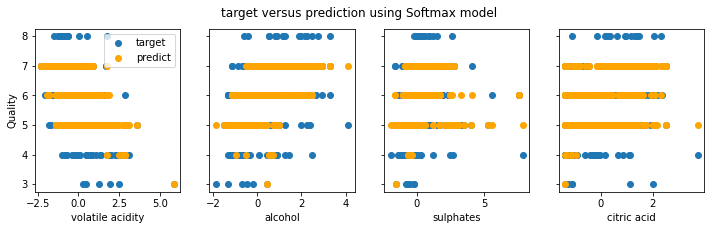

In [60]:
#predict target using normalized features
m = x.shape[0]
yp = np.zeros(m)
predictions = model.predict(x)
for loop in range(len(predictions)):
    yp[loop]=locateMax(predictions[loop])

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter([x[:,i]],y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter([x[:,i]],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Quality"); ax[0].legend()
fig.suptitle("target versus prediction using Softmax model")
plt.show()